In [1]:
import json
import numpy as np                                
import pandas as pd 
import sys                                        
import math                                       
import json
import boto3

In [2]:
df = pd.read_json('conala-train.json')

In [3]:
df.isnull().sum()

intent               0
question_id          0
rewritten_intent    79
snippet              0
dtype: int64

In [4]:
df1 = df[df.isnull().any(axis=1)]
df1.loc[:,'rewritten_intent'] = df1['intent']

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
df.update(df1)

In [6]:
df

,intent,question_id,rewritten_intent,snippet
0,How to convert a list of multiple integers int...,41067960.0,Concatenate elements of a list 'x' of multiple...,"sum(d * 10 ** i for i, d in enumerate(x[::-1]))"
1,How to convert a list of multiple integers int...,41067960.0,convert a list of integers into a single integer,"r = int(''.join(map(str, x)))"
2,how to convert a datetime string back to datet...,4170655.0,convert a DateTime string back to a DateTime o...,datetime.strptime('2010-11-13 10:33:54.227806'...
3,Averaging the values in a dictionary based on ...,29565452.0,get the average of a list values for each key ...,"[(i, sum(j) / len(j)) for i, j in list(d.items..."
4,zip lists in python,13704860.0,"zip two lists `[1, 2]` and `[3, 4]` into a lis...","zip([1, 2], [3, 4])"
5,Prepend the same string to all items in a list,13331419.0,prepend string 'hello' to all items in list 'a',['hello{0}'.format(i) for i in a]
6,regex for repeating words in a string in Python,25474338.0,regex for repeating words in a string `s`,re.sub('(?<!\\S)((\\S+)(?:\\s+\\2))(?:\\s+\\2)...
7,Normalizing a pandas DataFrame by row,18594469.0,normalize a pandas dataframe `df` by row,"df.div(df.sum(axis=1), axis=0)"
8,swap values in a tuple/list inside a list in p...,13384841.0,swap values in a tuple/list inside a list `myl...,"map(lambda t: (t[1], t[0]), mylist)"
9,swap values in a tuple/list inside a list in p...,13384841.0,Swap values in a tuple/list in list `mylist`,"[(t[1], t[0]) for t in mylist]"


In [7]:
df.isnull().sum()

intent              0
question_id         0
rewritten_intent    0
snippet             0
dtype: int64

In [8]:
x = df['rewritten_intent']
y = df['snippet']
x = pd.DataFrame(x)


In [9]:
x.columns

Index(['rewritten_intent'], dtype='object')

In [10]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
stop = set(stopwords.words('english'))
x1 = x['rewritten_intent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#x_train.append([i for i in sentence.lower().split() if i not in stop])
x1

0       Concatenate elements list 'x' multiple integer...
1                    convert list integers single integer
2       convert DateTime string back DateTime object f...
3             get average list values key dictionary `d`)
4       zip two lists `[1, 2]` `[3, 4]` list two tuple...
5                   prepend string 'hello' items list 'a'
6                        regex repeating words string `s`
7                     normalize pandas dataframe `df` row
8             swap values tuple/list inside list `mylist`
9                    Swap values tuple/list list `mylist`
10             Find next sibling element Python Selenium?
11      find occurrences pattern '\\[[^\\]]*\\]|\\([^\...
12             generate combinations 3 set `{1, 2, 3, 4}`
13      add multiple columns `hour`, `weekday`, `weekn...
14      BeautifulSoup search string 'Elsie' inside tag...
15      Convert datetime object `my_datetime` readable...
16            parse string `s` int string contains number
17      add di

In [14]:
!pip install wordcloud

    100% |████████████████████████████████| 368kB 26.1MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


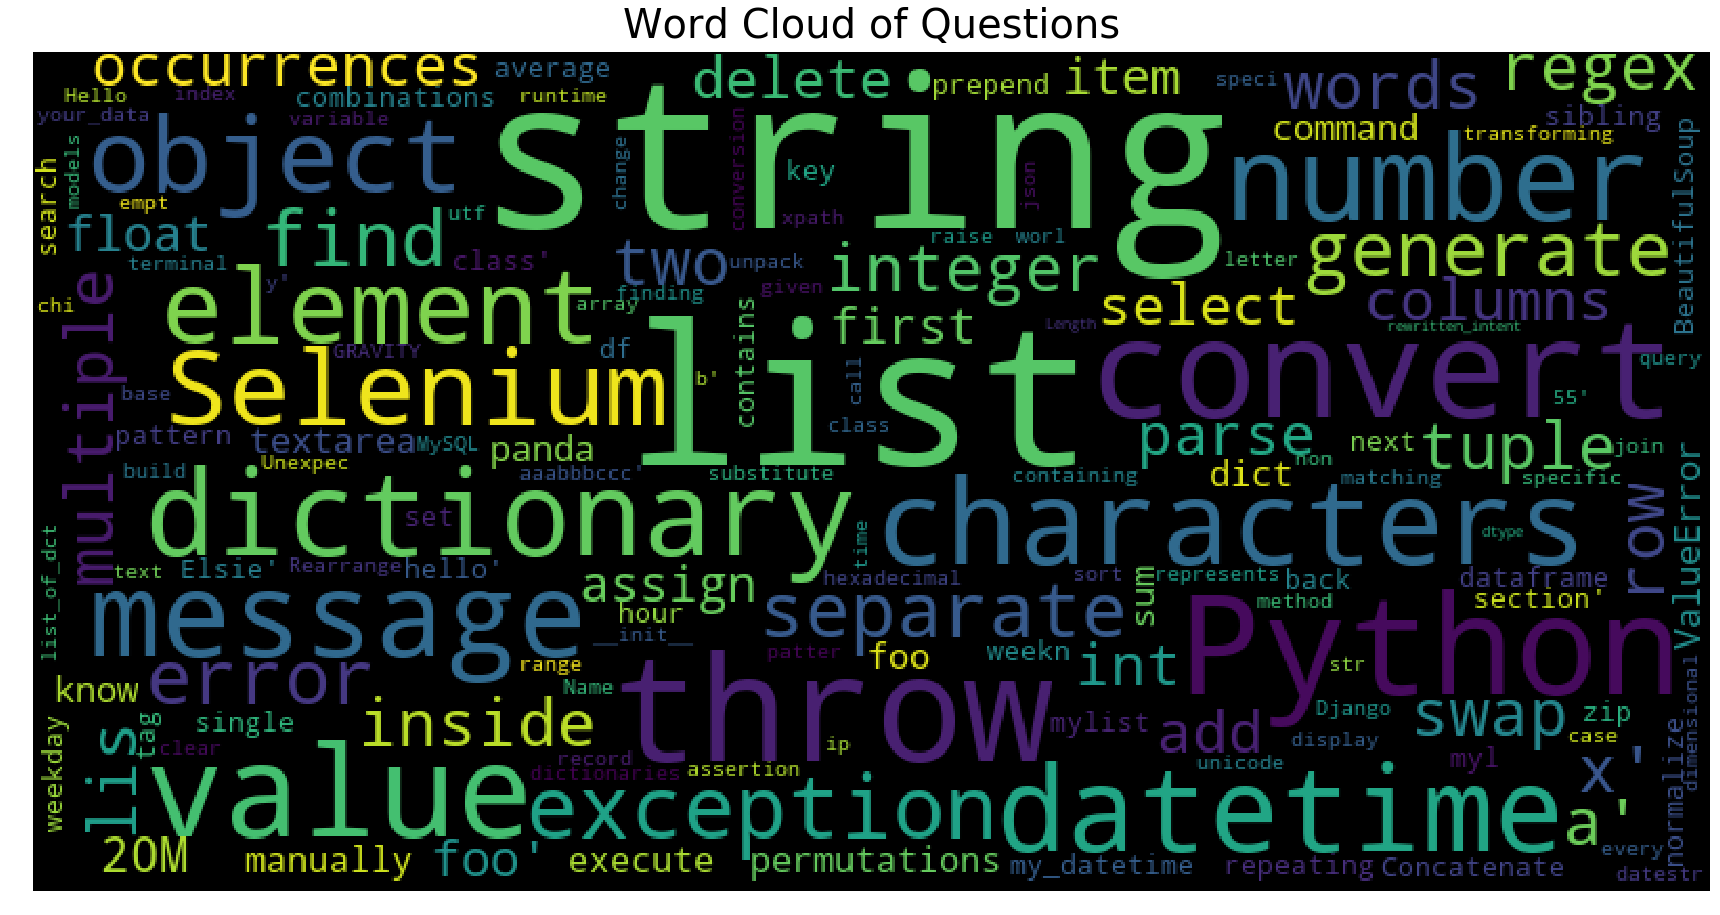

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df['rewritten_intent'], title="Word Cloud of Questions")

In [19]:
from collections import defaultdict

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

freq_dict = defaultdict(int)
for sent in df["rewritten_intent"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

freq_dict = defaultdict(int)
for sent in df["rewritten_intent"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of not sarcastic headlines", 
                                          "Frequent words of sarcastic headlines"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [48]:
l = []
for i in range(len(y)):
    l.append( tuple((x1[i] , y[i] )) )

[("Concatenate elements list 'x' multiple integers single integer",
  'sum(d * 10 ** i for i, d in enumerate(x[::-1]))'),
 ('convert list integers single integer', "r = int(''.join(map(str, x)))"),
 ("convert DateTime string back DateTime object format '%Y-%m-%d %H:%M:%S.%f'",
  "datetime.strptime('2010-11-13 10:33:54.227806', '%Y-%m-%d %H:%M:%S.%f')"),
 ('get average list values key dictionary `d`)',
  '[(i, sum(j) / len(j)) for i, j in list(d.items())]'),
 ('zip two lists `[1, 2]` `[3, 4]` list two tuples containing elements index list',
  'zip([1, 2], [3, 4])'),
 ("prepend string 'hello' items list 'a'",
  "['hello{0}'.format(i) for i in a]"),
 ('regex repeating words string `s`',
  "re.sub('(?<!\\\\S)((\\\\S+)(?:\\\\s+\\\\2))(?:\\\\s+\\\\2)+(?!\\\\S)', '\\\\1', s)"),
 ('normalize pandas dataframe `df` row', 'df.div(df.sum(axis=1), axis=0)'),
 ('swap values tuple/list inside list `mylist`',
  'map(lambda t: (t[1], t[0]), mylist)'),
 ('Swap values tuple/list list `mylist`', '[(t[1], 